# Analyse Des Données

Parie 1 : Eda du csv j1

In [1]:
data = '/home/yves/iadev-python/hackathon/data_buoy.csv'

Afficher le graphique

In [4]:
import csv

def afficher_csv(chemin_du_fichier):
    with open(chemin_du_fichier, 'r') as fichier_csv:
        lecteur_csv = csv.reader(fichier_csv)

        entete = next(lecteur_csv, None)
        if entete:
            print(f"Entête: {entete}")

        for ligne in lecteur_csv:
            print(ligne)

afficher_csv("/home/yves/iadev-python/hackathon/data_buoy.csv")





Entête: ['DateHeure', 'H13D', 'HMAXD', 'TH13D', 'THMAXD']
['2021-01-01 00:00:00', '1.23', '2.12', '8.0', '7.2']
['2021-01-01 00:30:00', '1.28', '2.88', '8.2', '8.2']
['2021-01-01 01:00:00', '1.38', '2.61', '8.3', '8.0']
['2021-01-01 01:30:00', '1.53', '2.68', '8.2', '7.9']
['2021-01-01 02:00:00', '1.73', '2.62', '8.4', '8.5']
['2021-01-01 02:30:00', '1.62', '2.5', '8.4', '8.6']
['2021-01-01 03:00:00', '1.8', '3.04', '8.4', '8.1']
['2021-01-01 03:30:00', '1.74', '2.9', '8.3', '9.0']
['2021-01-01 04:00:00', '1.92', '2.95', '8.2', '8.4']
['2021-01-01 04:30:00', '1.96', '3.69', '8.3', '7.2']
['2021-01-01 05:00:00', '1.98', '3.43', '8.1', '8.3']
['2021-01-01 05:30:00', '1.97', '3.08', '8.1', '8.0']
['2021-01-01 06:00:00', '2.06', '3.59', '8.0', '7.9']
['2021-01-01 06:30:00', '2.03', '3.25', '8.2', '8.0']
['2021-01-01 07:00:00', '1.82', '3.4', '8.0', '8.1']
['2021-01-01 07:30:00', '1.95', '3.29', '8.4', '8.5']
['2021-01-01 08:00:00', '1.88', '3.02', '8.4', '8.8']
['2021-01-01 08:30:00', '1.6

Les données manquantes

In [5]:
import pandas as pd

def verifier_donnees_manquantes(chemin_du_fichier):
    dataframe = pd.read_csv(chemin_du_fichier)

    if dataframe.isnull().values.any():
        print("Il y a des données manquantes dans le fichier.")
    else:
        print("Il n'y a pas de données manquantes dans le fichier.")

verifier_donnees_manquantes("/home/yves/iadev-python/hackathon/data_buoy.csv")



Il n'y a pas de données manquantes dans le fichier.


Graphique récent entre les données temporelle et la Hauteur maximale des vagues sachant que les données sont declenché toutes les demi heures.

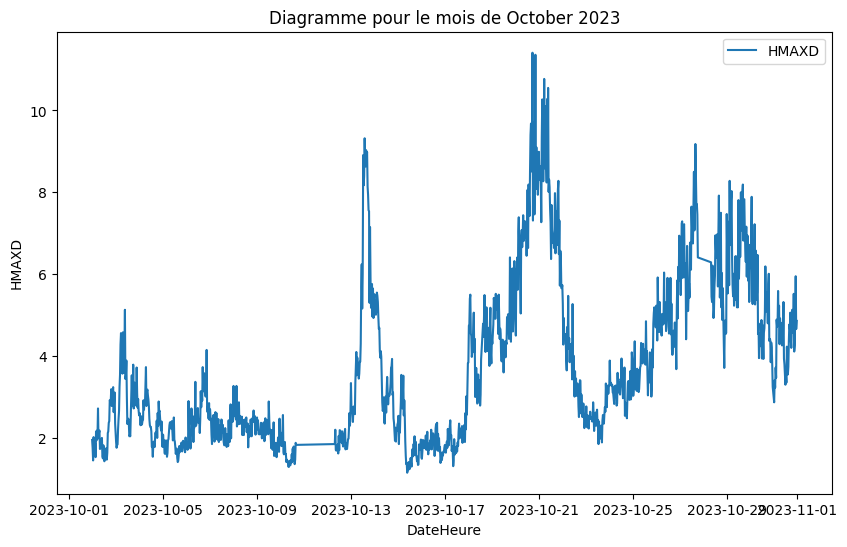

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_diagrammes_six_derniers_mois(chemin_du_fichier):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    dataframe = dataframe.sort_values(by='DateHeure', ascending=False)

    six_derniers_mois = dataframe['DateHeure'].iloc[:1]

    for mois in six_derniers_mois:
        mois_data = dataframe[(dataframe['DateHeure'] >= mois.replace(day=1)) & (dataframe['DateHeure'] < (mois + pd.DateOffset(months=1)).replace(day=1))]

        plt.figure(figsize=(10, 6))
        plt.plot(mois_data['DateHeure'], mois_data['HMAXD'], label='HMAXD')
        plt.title(f"Diagramme pour le mois de {mois.strftime('%B %Y')}")
        plt.xlabel('DateHeure')
        plt.ylabel('HMAXD')
        plt.legend()
        plt.show()

afficher_diagrammes_six_derniers_mois("/home/yves/iadev-python/hackathon/data_buoy.csv")


In [22]:
import pandas as pd

def afficher_chiffres_six_derniers_mois(chemin_du_fichier):
    pd.set_option('display.max_rows', None)

    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    dataframe = dataframe.sort_values(by='DateHeure', ascending=False)

    six_derniers_mois = dataframe['DateHeure'].iloc[:1]

    for mois in six_derniers_mois:
        mois_data = dataframe[(dataframe['DateHeure'] >= mois.replace(day=1)) & (dataframe['DateHeure'] < (mois + pd.DateOffset(months=1)).replace(day=1))]

        print(f"Chiffres pour le mois de {mois.strftime('%B %Y')}:")
        print(mois_data['HMAXD'])

afficher_chiffres_six_derniers_mois("/home/yves/iadev-python/hackathon/data_buoy.csv")


Chiffres pour le mois de October 2023:
47223     4.86
47222     4.66
47221     5.95
47220     4.94
47219     4.26
47218     4.11
47217     5.52
47216     4.66
47215     4.57
47214     5.13
47213     4.70
47212     4.20
47211     4.41
47210     5.06
47209     4.66
47208     4.77
47207     4.36
47206     3.74
47205     3.55
47204     3.80
47203     4.23
47202     3.35
47201     3.57
47200     3.30
47199     3.58
47198     3.80
47197     3.94
47196     5.32
47195     4.52
47194     4.82
47193     4.26
47192     4.70
47191     4.50
47190     4.53
47189     4.92
47188     4.29
47187     5.23
47186     4.81
47185     5.59
47184     4.80
47183     4.72
47182     4.89
47181     3.47
47180     3.72
47179     3.23
47178     3.41
47177     2.87
47176     3.01
47175     3.12
47174     3.25
47173     3.80
47172     4.21
47171     4.33
47170     3.85
47169     4.39
47168     4.42
47167     4.37
47166     6.01
47165     5.77
47164     4.80
47163     5.33
47162     5.55
47161     5.09
47160     5.41
4

Graphique récent entre les données temporelle et la Hauteur maximale des vagues pour les 6 derniers mois

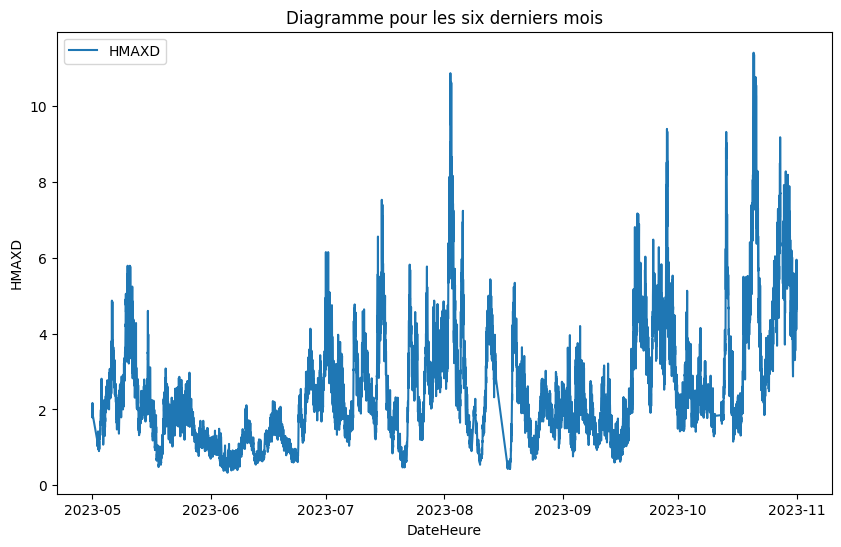

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def afficher_diagramme_six_derniers_mois(chemin_du_fichier):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    dataframe = dataframe.sort_values(by='DateHeure', ascending=False)

    date_la_plus_recente = dataframe['DateHeure'].max()

    date_six_mois_avant = date_la_plus_recente - pd.DateOffset(months=6)

    donnees_six_derniers_mois = dataframe[(dataframe['DateHeure'] >= date_six_mois_avant) & (dataframe['DateHeure'] <= date_la_plus_recente)]

    # Créer un diagramme
    plt.figure(figsize=(10, 6))
    plt.plot(donnees_six_derniers_mois['DateHeure'], donnees_six_derniers_mois['HMAXD'], label='HMAXD')
    plt.title(f"Diagramme pour les six derniers mois")
    plt.xlabel('DateHeure')
    plt.ylabel('HMAXD')
    plt.legend()
    plt.show()

afficher_diagramme_six_derniers_mois("/home/yves/iadev-python/hackathon/data_buoy.csv")



Date de la tempête ciarran le 01.11.2023 et 02.11.2023

Remarque cruciale : Matpotlibe relie tout les points hors il y a des journées avec des absneces de données donc il n'y a pas de données manquantes dans le csv mais il y a des ruptures de données des balises.

###  Hauteur significative des vagues définies par passage 
au niveau moyen par valeurs décroissantes

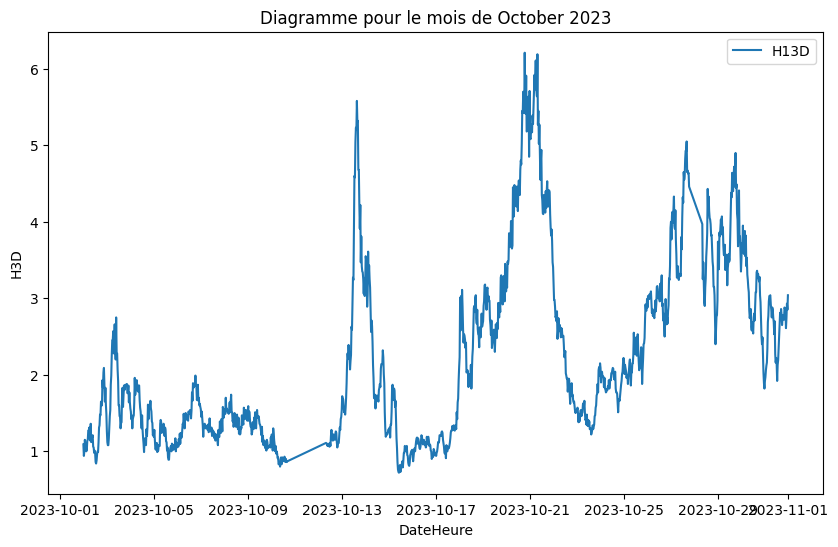

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_diagrammes_six_derniers_mois(chemin_du_fichier):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    dataframe = dataframe.sort_values(by='DateHeure', ascending=False)

    six_derniers_mois = dataframe['DateHeure'].iloc[:1]

    for mois in six_derniers_mois:
        mois_data = dataframe[(dataframe['DateHeure'] >= mois.replace(day=1)) & (dataframe['DateHeure'] < (mois + pd.DateOffset(months=1)).replace(day=1))]

        plt.figure(figsize=(10, 6))
        plt.plot(mois_data['DateHeure'], mois_data['H13D'], label='H13D')
        plt.title(f"Diagramme pour le mois de {mois.strftime('%B %Y')}")
        plt.xlabel('DateHeure')
        plt.ylabel('H13D')
        plt.legend()
        plt.show()

afficher_diagrammes_six_derniers_mois("/home/yves/iadev-python/hackathon/data_buoy.csv")

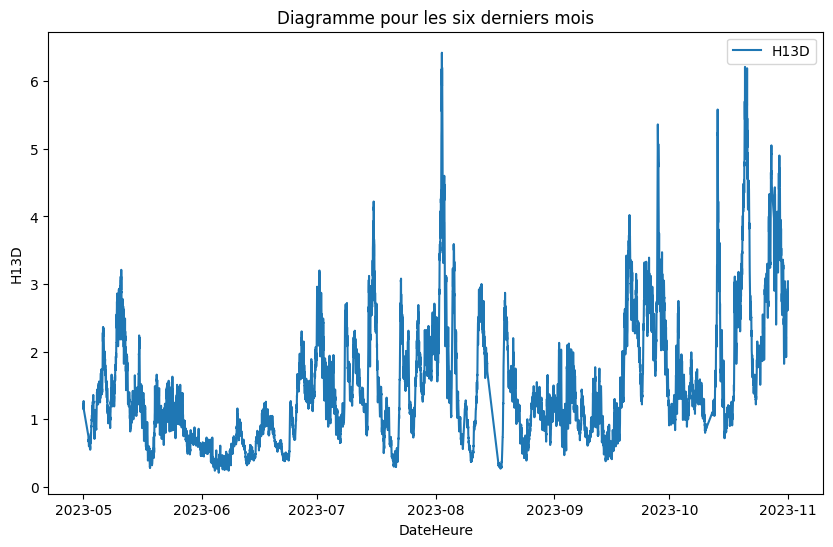

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def afficher_diagramme_six_derniers_mois(chemin_du_fichier):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    dataframe = dataframe.sort_values(by='DateHeure', ascending=False)

    date_la_plus_recente = dataframe['DateHeure'].max()

    date_six_mois_avant = date_la_plus_recente - pd.DateOffset(months=6)

    donnees_six_derniers_mois = dataframe[(dataframe['DateHeure'] >= date_six_mois_avant) & (dataframe['DateHeure'] <= date_la_plus_recente)]

    # Créer un diagramme
    plt.figure(figsize=(10, 6))
    plt.plot(donnees_six_derniers_mois['DateHeure'], donnees_six_derniers_mois['H13D'], label='H13D')
    plt.title(f"Diagramme pour les six derniers mois")
    plt.xlabel('DateHeure')
    plt.ylabel('H13D')
    plt.legend()
    plt.show()

afficher_diagramme_six_derniers_mois("/home/yves/iadev-python/hackathon/data_buoy.csv")

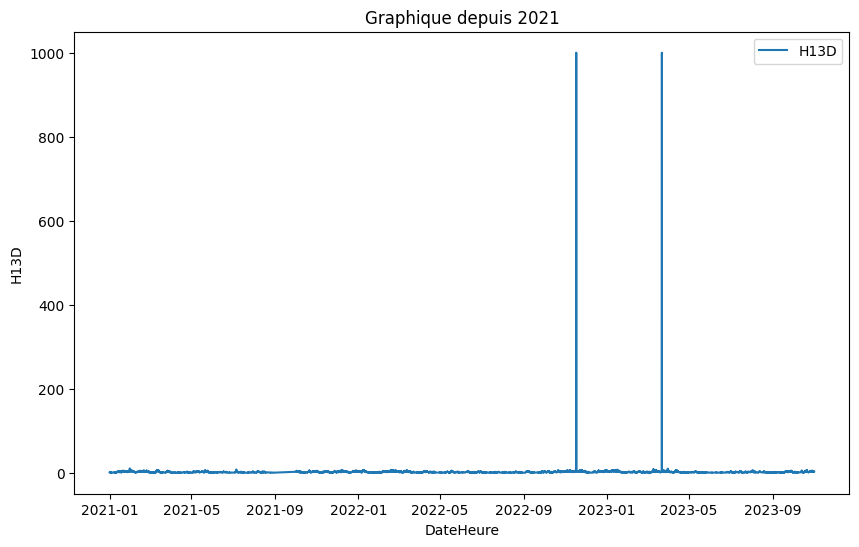

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_graphique_depuis_2021(chemin_du_fichier):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    donnees_depuis_2021 = dataframe[dataframe['DateHeure'].dt.year >= 2021]

    # Créer un graphique
    plt.figure(figsize=(10, 6))
    plt.plot(donnees_depuis_2021['DateHeure'], donnees_depuis_2021['H13D'], label='H13D')
    plt.title("Graphique depuis 2021")
    plt.xlabel('DateHeure')
    plt.ylabel('H13D')
    plt.legend()
    plt.show()

afficher_graphique_depuis_2021("/home/yves/iadev-python/hackathon/data_buoy.csv")


In [37]:
import pandas as pd

def dix_plus_hautes_valeurs(chemin_du_fichier):
    # Charger le fichier CSV dans un DataFrame
    dataframe = pd.read_csv(chemin_du_fichier)

    # Trier le DataFrame par la colonne 'HMAXD' de manière décroissante
    dataframe = dataframe.sort_values(by='H13D', ascending=False)

    # Sélectionner les 10 valeurs les plus élevées
    dix_plus_hautes = dataframe.head(10)

    print("Les 10 valeurs les plus élevées de la colonne 'H13D' :")
    print(dix_plus_hautes[['DateHeure', 'H13D']])

# Remplacez "chemin_du_fichier.csv" par le chemin réel de votre fichier CSV
dix_plus_hautes_valeurs("/home/yves/iadev-python/hackathon/data_buoy.csv")


Les 10 valeurs les plus élevées de la colonne 'H13D' :
                 DateHeure     H13D
36824  2023-03-22 11:30:00  999.999
30859  2022-11-16 19:00:00  999.999
36822  2023-03-22 10:30:00  999.999
1386   2021-01-30 15:30:00   10.230
37242  2023-03-31 05:30:00    9.800
1390   2021-01-30 17:30:00    9.620
37240  2023-03-31 04:30:00    9.370
36231  2023-03-10 02:30:00    9.050
1384   2021-01-30 14:30:00    8.900
1391   2021-01-30 18:00:00    8.880


Nous avons 3 données abberantes que nous allons supprimer. 

Nous supprimons les données ou les vagues sont supperieur a 100 mètres

In [39]:
import pandas as pd

def supprimer_lignes_superieures_seuil(chemin_du_fichier, seuil):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    colonnes_a_comparer = dataframe.columns[1:]  # Sélectionner toutes les colonnes sauf la première
    lignes_a_conserver = dataframe.loc[:, colonnes_a_comparer].apply(lambda x: x <= seuil).all(axis=1)

    dataframe = dataframe.loc[lignes_a_conserver]

    return dataframe

nouveau_dataframe = supprimer_lignes_superieures_seuil("/home/yves/iadev-python/hackathon/data_buoy.csv", seuil=100)
print(nouveau_dataframe)


                DateHeure   H13D  HMAXD  TH13D  THMAXD
0     2021-01-01 00:00:00   1.23   2.12    8.0     7.2
1     2021-01-01 00:30:00   1.28   2.88    8.2     8.2
2     2021-01-01 01:00:00   1.38   2.61    8.3     8.0
3     2021-01-01 01:30:00   1.53   2.68    8.2     7.9
4     2021-01-01 02:00:00   1.73   2.62    8.4     8.5
5     2021-01-01 02:30:00   1.62   2.50    8.4     8.6
6     2021-01-01 03:00:00   1.80   3.04    8.4     8.1
7     2021-01-01 03:30:00   1.74   2.90    8.3     9.0
8     2021-01-01 04:00:00   1.92   2.95    8.2     8.4
9     2021-01-01 04:30:00   1.96   3.69    8.3     7.2
10    2021-01-01 05:00:00   1.98   3.43    8.1     8.3
11    2021-01-01 05:30:00   1.97   3.08    8.1     8.0
12    2021-01-01 06:00:00   2.06   3.59    8.0     7.9
13    2021-01-01 06:30:00   2.03   3.25    8.2     8.0
14    2021-01-01 07:00:00   1.82   3.40    8.0     8.1
15    2021-01-01 07:30:00   1.95   3.29    8.4     8.5
16    2021-01-01 08:00:00   1.88   3.02    8.4     8.8
17    2021

Les données aberrantes sont supprimés

Les 10 lignes avec les valeurs les plus élevées

In [41]:
import pandas as pd

def afficher_plus_grosses_donnees(chemin_du_fichier, seuil):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    colonnes_a_comparer = dataframe.columns[1:]  # Sélectionner toutes les colonnes sauf la première
    lignes_a_conserver = dataframe.loc[:, colonnes_a_comparer].apply(lambda x: x <= seuil).all(axis=1)

    dataframe = dataframe.loc[lignes_a_conserver]

    plus_grosses_donnees = dataframe.sort_values(by='HMAXD', ascending=False).head(10)
    print("Les 10 lignes avec les valeurs les plus élevées dans la colonne 'H13D':")
    print(plus_grosses_donnees[['DateHeure', 'H13D']])

afficher_plus_grosses_donnees("/home/yves/iadev-python/hackathon/data_buoy.csv", seuil=100)


Les 10 lignes avec les valeurs les plus élevées dans la colonne 'H13D':
                DateHeure   H13D
1386  2021-01-30 15:30:00  10.23
1388  2021-01-30 16:30:00   8.83
36231 2023-03-10 02:30:00   9.05
37242 2023-03-31 05:30:00   9.80
1392  2021-01-30 18:30:00   8.06
36236 2023-03-10 05:00:00   7.78
33690 2023-01-16 02:00:00   7.36
37235 2023-03-31 01:30:00   8.32
37247 2023-03-31 08:00:00   8.30
1390  2021-01-30 17:30:00   9.62


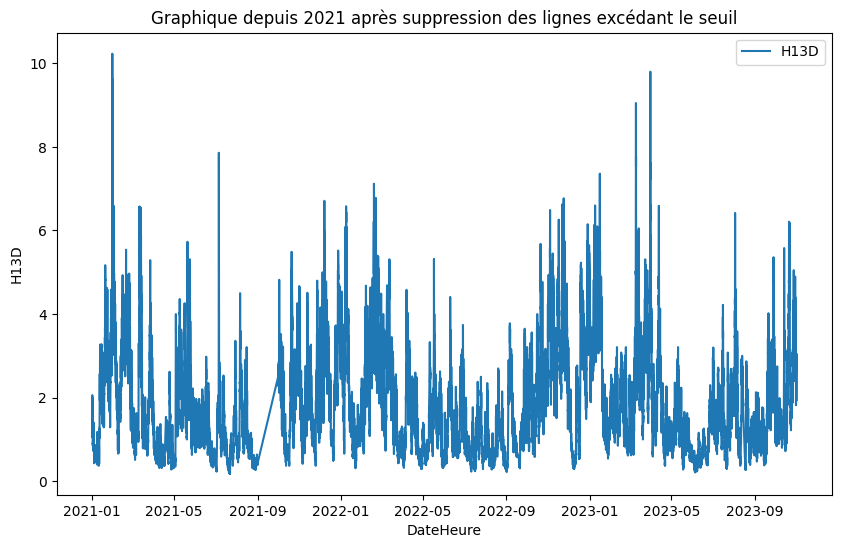

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_graphique_depuis_2021_apres_suppression(chemin_du_fichier, seuil):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    colonnes_a_comparer = dataframe.columns[1:]  # Sélectionner toutes les colonnes sauf la première
    lignes_a_conserver = dataframe.loc[:, colonnes_a_comparer].apply(lambda x: x <= seuil).all(axis=1)

    dataframe = dataframe.loc[lignes_a_conserver]

    donnees_depuis_2021 = dataframe[dataframe['DateHeure'].dt.year >= 2021]

    # Créer un graphique
    plt.figure(figsize=(10, 6))
    plt.plot(donnees_depuis_2021['DateHeure'], donnees_depuis_2021['H13D'], label='H13D')
    plt.title("Graphique depuis 2021 après suppression des lignes excédant le seuil")
    plt.xlabel('DateHeure')
    plt.ylabel('H13D')
    plt.legend()
    plt.show()

# Remplacez "chemin_du_fichier.csv" par le chemin réel de votre fichier CSV
# Remplacez "seuil" par le seuil souhaité
afficher_graphique_depuis_2021_apres_suppression("/home/yves/iadev-python/hackathon/data_buoy.csv", seuil=100)


Affichage de la Période significative des vagues définies par passage 
au niveau moyen par valeurs décroissantes.

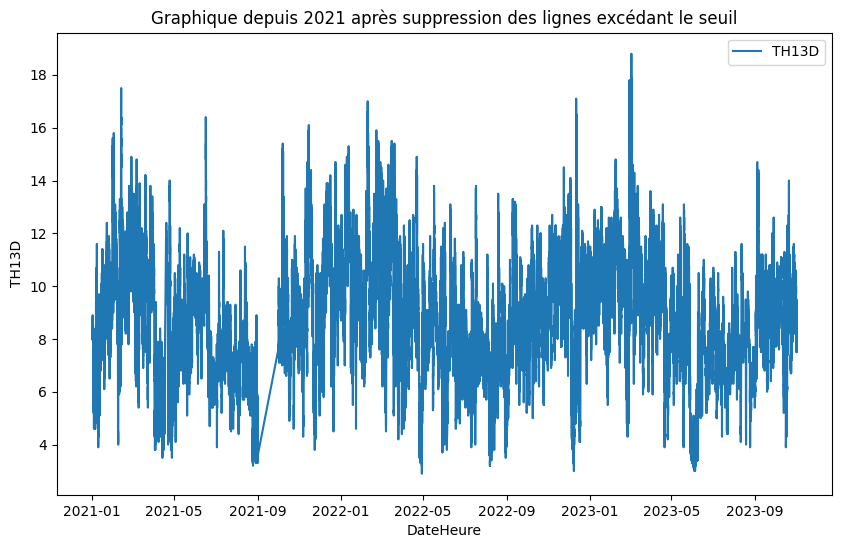

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_graphique_depuis_2021_apres_suppression(chemin_du_fichier, seuil):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    colonnes_a_comparer = dataframe.columns[1:]  
    lignes_a_conserver = dataframe.loc[:, colonnes_a_comparer].apply(lambda x: x <= seuil).all(axis=1)

    dataframe = dataframe.loc[lignes_a_conserver]

    donnees_depuis_2021 = dataframe[dataframe['DateHeure'].dt.year >= 2021]

    plt.figure(figsize=(10, 6))
    plt.plot(donnees_depuis_2021['DateHeure'], donnees_depuis_2021['TH13D'], label='TH13D')
    plt.title("Graphique depuis 2021 après suppression des lignes excédant le seuil")
    plt.xlabel('DateHeure')
    plt.ylabel('TH13D')
    plt.legend()
    plt.show()

afficher_graphique_depuis_2021_apres_suppression("/home/yves/iadev-python/hackathon/data_buoy.csv", seuil=100)


Essaie numéro 1 : recevoir une alerte lorsque la hauteur de vague depasse les 9 mètres

In [50]:
import pandas as pd

def detection_alerte_rouge(chemin_du_fichier, seuil_alerte):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    alerte_rouge = dataframe[dataframe['TH13D'] > seuil_alerte]

    if not alerte_rouge.empty:
        print(f"Alerte Rouge ! La hauteur des vagues dépasse les {seuil_alerte} mètres.")
        print(alerte_rouge[['DateHeure', 'TH13D']])
    else:
        print(f"Pas d'alerte Rouge. La hauteur des vagues est inférieure ou égale à {seuil_alerte} mètres.")


detection_alerte_rouge("/home/yves/iadev-python/hackathon/data_buoy.csv", seuil_alerte=9)



Alerte Rouge ! La hauteur des vagues dépasse les 9 mètres.
                DateHeure    TH13D
260   2021-01-06 12:00:00    9.400
261   2021-01-06 12:30:00    9.300
262   2021-01-06 13:00:00    9.100
270   2021-01-06 17:00:00    9.800
271   2021-01-06 17:30:00   10.000
276   2021-01-06 20:00:00    9.400
277   2021-01-06 20:30:00    9.900
278   2021-01-06 21:00:00   10.300
280   2021-01-06 22:00:00   10.200
281   2021-01-06 23:00:00    9.400
282   2021-01-06 23:30:00    9.400
283   2021-01-07 00:00:00    9.500
284   2021-01-07 00:30:00    9.500
285   2021-01-07 01:00:00    9.800
287   2021-01-07 02:00:00    9.200
288   2021-01-07 02:30:00    9.900
289   2021-01-07 03:00:00   10.000
290   2021-01-07 03:30:00   10.000
291   2021-01-07 04:00:00    9.200
292   2021-01-07 04:30:00    9.700
293   2021-01-07 05:00:00    9.800
294   2021-01-07 05:30:00   10.000
295   2021-01-07 06:00:00    9.900
296   2021-01-07 06:30:00   10.500
297   2021-01-07 07:00:00   10.300
298   2021-01-07 07:30:00   10.

In [52]:
import pandas as pd

def nombre_donnees_plus_de_9_metres(chemin_du_fichier, seuil_alerte):
    dataframe = pd.read_csv(chemin_du_fichier)

    dataframe['DateHeure'] = pd.to_datetime(dataframe['DateHeure'], format='%Y-%m-%d %H:%M:%S')

    # Sélectionner les données où la hauteur des vagues dépasse le seuil
    donnees_plus_de_9_metres = dataframe[dataframe['HMAXD'] > seuil_alerte]

    nombre_donnees = len(donnees_plus_de_9_metres)
    print(f"Nombre de données où la hauteur des vagues dépasse les {seuil_alerte} mètres : {nombre_donnees}")

nombre_donnees_plus_de_9_metres("/home/yves/iadev-python/hackathon/data_buoy.csv", seuil_alerte=9)


Nombre de données où la hauteur des vagues dépasse les 9 mètres : 556


J'ai recu 556 alertes depuis 2021

Erreur moyenne quadratique : 3.2955515202173307


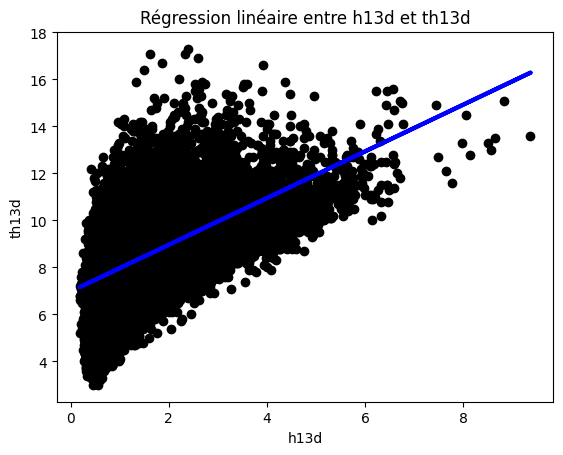

In [2]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supposons que tu aies un ensemble de données stocké dans un fichier CSV
# Remplace le chemin du fichier par le chemin réel de ton fichier de données
data = pd.read_csv("/home/yves/iadev-python/hackathon/data_buoy.csv")

# Séparation des données en variables indépendantes (X) et dépendantes (y)
X = data[['H13D']]  # Remplace 'h13d' par le nom de ta première variable indépendante
y = data['TH13D']    # Remplace 'th13d' par le nom de ta variable dépendante

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Erreur moyenne quadratique : {mse}")

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('h13d')
plt.ylabel('th13d')
plt.title('Régression linéaire entre h13d et th13d')
plt.show()


Erreur moyenne quadratique : 3.051098843999618


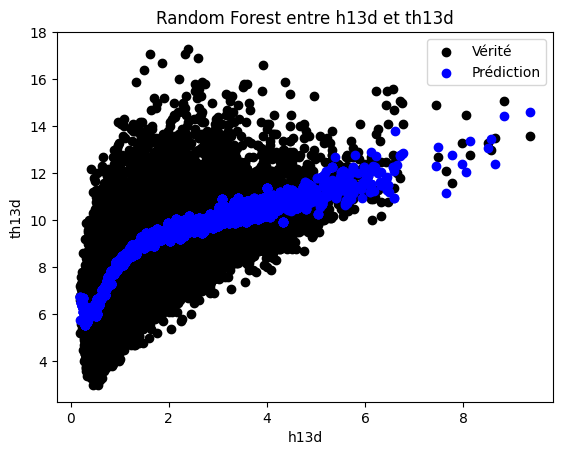

In [4]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv("/home/yves/iadev-python/hackathon/data_buoy.csv")

# Séparation des données en variables indépendantes (X) et dépendantes (y)
X = data[['H13D']]  # Remplace 'h13d' par le nom de ta première variable indépendante
y = data['TH13D']    # Remplace 'th13d' par le nom de ta variable dépendante

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Erreur moyenne quadratique : {mse}")

plt.scatter(X_test, y_test, color='black', label='Vérité')
plt.scatter(X_test, y_pred, color='blue', label='Prédiction')
plt.xlabel('h13d')
plt.ylabel('th13d')
plt.title('Random Forest entre h13d et th13d')
plt.legend()
plt.show()


Le script que je t'ai fourni utilise un modèle de Random Forest pour créer une relation entre la variable  "h13d" et la variable  "th13d". 

En résumé, si l'erreur moyenne quadratique est basse et le graphique de dispersion montre une correspondance étroite entre les valeurs réelles et les prédictions, cela suggère que le modèle de Random Forest est capable de capturer la relation entre "h13d" et "th13d". Si l'erreur est élevée, cela pourrait indiquer que le modèle ne généralise pas bien aux données de test, et des ajustements au modèle pourraient être nécessaires.







KNN

Erreur moyenne quadratique : 3.611051900476443


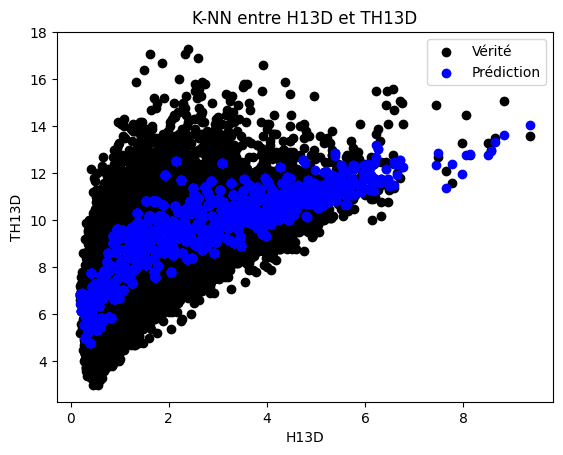

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_csv("/home/yves/iadev-python/hackathon/data_buoy.csv")

X = data[['H13D']]  # Remplace 'H13D' par le nom de ta première variable indépendante
y = data['TH13D']    # Remplace 'TH13D' par le nom de ta variable dépendante

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)  # Tu peux ajuster le nombre de voisins selon tes besoins

# Entraînement du modèle
knn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = knn_model.predict(X_test)

# Calcul de l'erreur moyenne quadratique
mse = mean_squared_error(y_test, y_pred)

# Affichage des résultats
print(f"Erreur moyenne quadratique : {mse}")

# Affichage de la prédiction par rapport à la vérité
plt.scatter(X_test, y_test, color='black', label='Vérité')
plt.scatter(X_test, y_pred, color='blue', label='Prédiction')
plt.xlabel('H13D')
plt.ylabel('TH13D')
plt.title('K-NN entre H13D et TH13D')
plt.legend()
plt.show()


. Ces paramètres sont utilisés pour évaluer la force et l'énergie des vagues dans un environnement océanique donné.

Les prévisions de vagues consistent à utiliser des modèles basés sur des données météorologiques et océanographiques pour estimer comment la hauteur et la période significatives des vagues vont évoluer dans le temps et l'espace. Ces prévisions sont utiles pour planifier des activités maritimes, assurer la sécurité en mer et prendre des décisions en fonction des conditions attendues de la mer. Il est important de noter que les prévisions sont des estimations sujettes à des variations en raison de la complexité des interactions océaniques et atmosphériques.

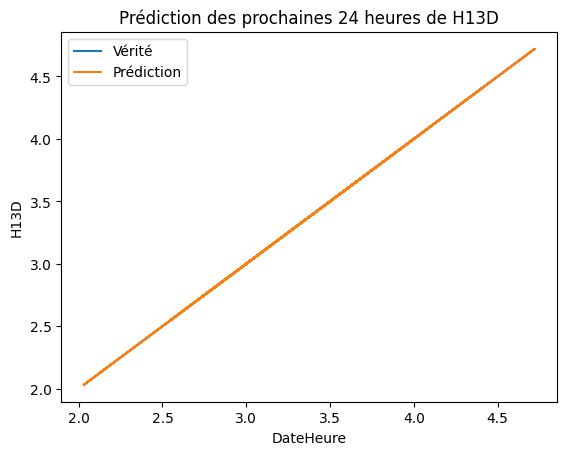

In [10]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supposons que tu aies un ensemble de données stocké dans un fichier CSV
# Remplace le chemin du fichier par le chemin réel de ton fichier de données
data = pd.read_csv("/home/yves/iadev-python/hackathon/data_buoy.csv")

# Assurer que la colonne "DateHeure" est au format datetime
data['DateHeure'] = pd.to_datetime(data['DateHeure'])

# Sélectionner les trois derniers jours de données
derniers_trois_jours = data[data['DateHeure'] >= (data['DateHeure'].max() - pd.DateOffset(days=3))]

# Séparation des données en variables indépendantes (X) et dépendantes (y)
X = derniers_trois_jours[['H13D']]  # Remplace 'H13D' par le nom de ta première variable indépendante
y = derniers_trois_jours['H13D']    # Remplace 'H13D' par le nom de ta variable dépendante

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions pour les prochaines 24 heures
nouvelles_donnees = pd.DataFrame({
    'H13D': model.predict(X_test)  # Prédire pour les prochaines 24 heures
})

# Affichage des résultats
plt.plot(X_test, y_test, label='Vérité')
plt.plot(X_test, model.predict(X_test), label='Prédiction')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.title('Prédiction des prochaines 24 heures de H13D')
plt.legend()
plt.show()


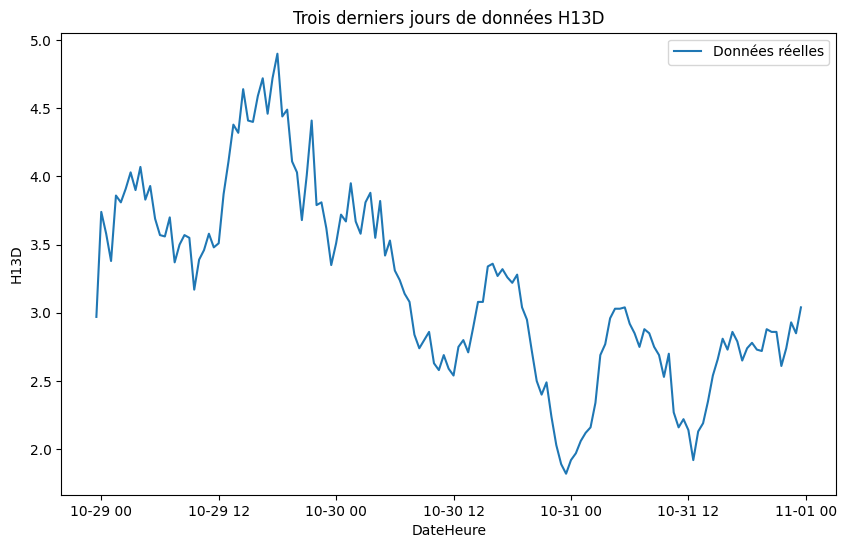

/home/yves/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


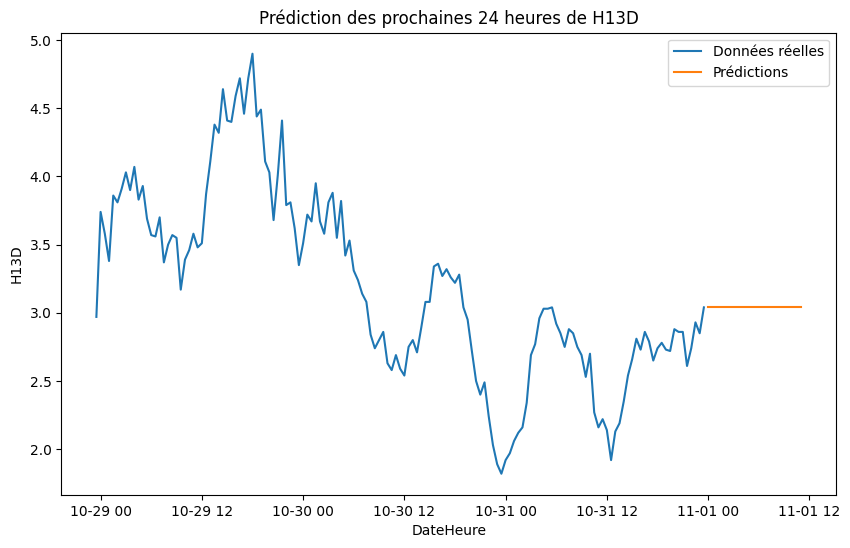

In [14]:


# Assurer que la colonne "DateHeure" est au format datetime
data['DateHeure'] = pd.to_datetime(data['DateHeure'])

# Sélectionner les trois derniers jours de données
derniers_trois_jours = data[data['DateHeure'] >= (data['DateHeure'].max() - pd.DateOffset(days=3))]

# Afficher les trois derniers jours de données
plt.figure(figsize=(10, 6))
plt.plot(derniers_trois_jours['DateHeure'], derniers_trois_jours['H13D'], label='Données réelles')
plt.title('Trois derniers jours de données H13D')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()

# Préparation des données pour la prédiction des prochaines 24 heures
X_pred = pd.DataFrame({
    'H13D': derniers_trois_jours['H13D'].values
})


# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_pred, derniers_trois_jours['H13D'])

# Générer des timestamps pour les prochaines 24 heures
prochaines_24_heures = pd.date_range(derniers_trois_jours['DateHeure'].max(), periods=24, freq='30min')[1:]

# Prédictions pour les prochaines 24 heures
predictions = pd.DataFrame({
    'DateHeure': prochaines_24_heures,
    'H13D_Prediction': [model.predict(X_pred.tail(1).values.reshape(1, -1))[0]] * len(prochaines_24_heures)
})


# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(derniers_trois_jours['DateHeure'], derniers_trois_jours['H13D'], label='Données réelles')
plt.plot(predictions['DateHeure'], predictions['H13D_Prediction'], label='Prédictions')
plt.title('Prédiction des prochaines 24 heures de H13D')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


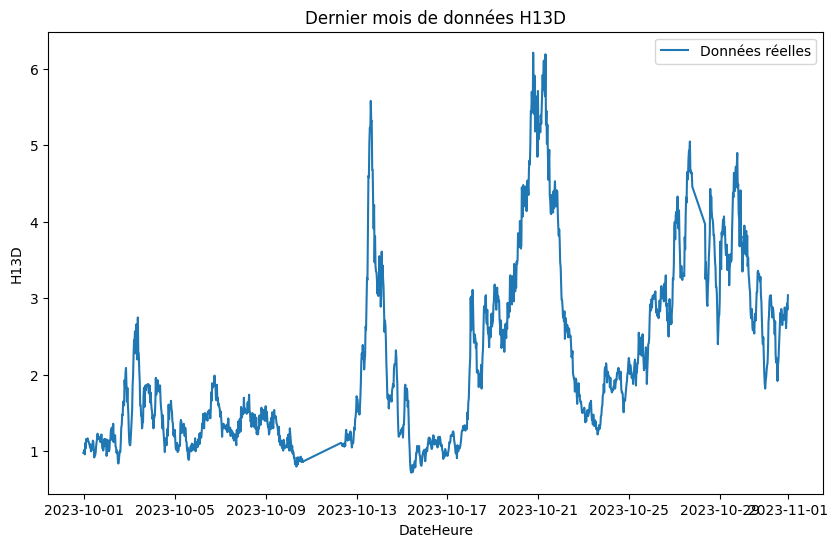

/home/yves/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


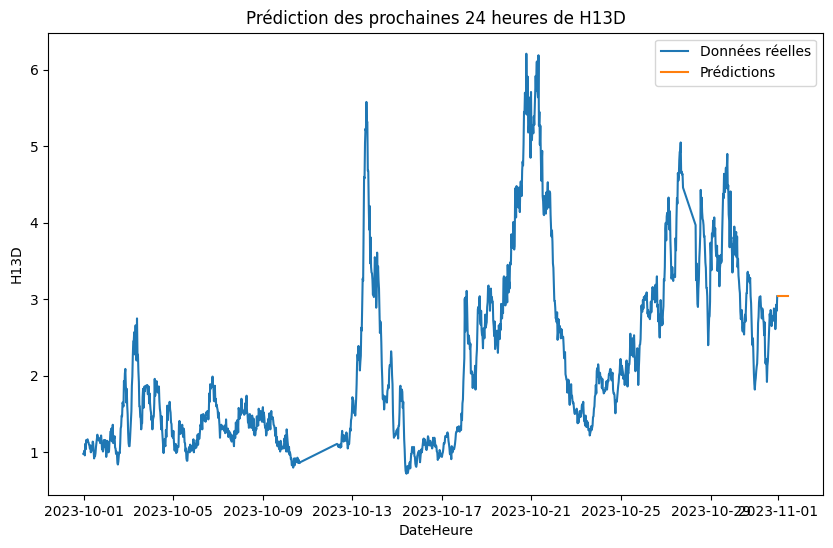

In [16]:


# Assurer que la colonne "DateHeure" est au format datetime
data['DateHeure'] = pd.to_datetime(data['DateHeure'])

# Sélectionner le dernier mois de données
dernier_mois = data[data['DateHeure'] >= (data['DateHeure'].max() - pd.DateOffset(months=1))]

# Afficher le dernier mois de données
plt.figure(figsize=(10, 6))
plt.plot(dernier_mois['DateHeure'], dernier_mois['H13D'], label='Données réelles')
plt.title('Dernier mois de données H13D')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()

# Préparation des données pour l'entraînement du modèle
X_train = dernier_mois[['H13D']]
y_train = dernier_mois['H13D']

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Générer des timestamps pour les prochaines 24 heures
prochaines_24_heures = pd.date_range(dernier_mois['DateHeure'].max(), periods=24, freq='30min')[1:]

# Prédictions pour les prochaines 24 heures
X_pred = pd.DataFrame({
    'H13D': model.predict(dernier_mois[['H13D']])
})

# Générer des timestamps pour les prochaines 24 heures
prochaines_24_heures = pd.date_range(dernier_mois['DateHeure'].max(), periods=24, freq='30min')[1:]

# Prédictions pour les prochaines 24 heures
predictions = pd.DataFrame({
    'DateHeure': prochaines_24_heures,
    'H13D_Prediction': [model.predict(X_pred.tail(1).values.reshape(1, -1))[0]] * len(prochaines_24_heures)
})


# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(dernier_mois['DateHeure'], dernier_mois['H13D'], label='Données réelles')
plt.plot(predictions['DateHeure'], predictions['H13D_Prediction'], label='Prédictions')
plt.title('Prédiction des prochaines 24 heures de H13D')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


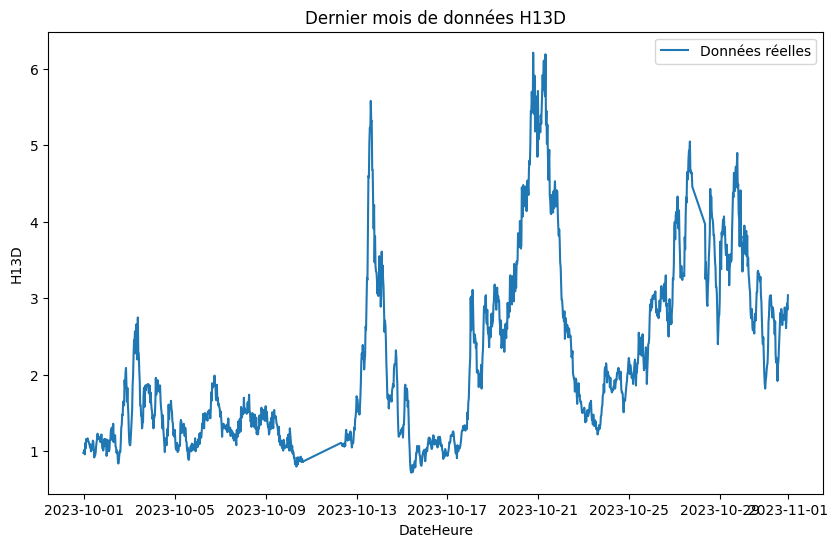

/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorica

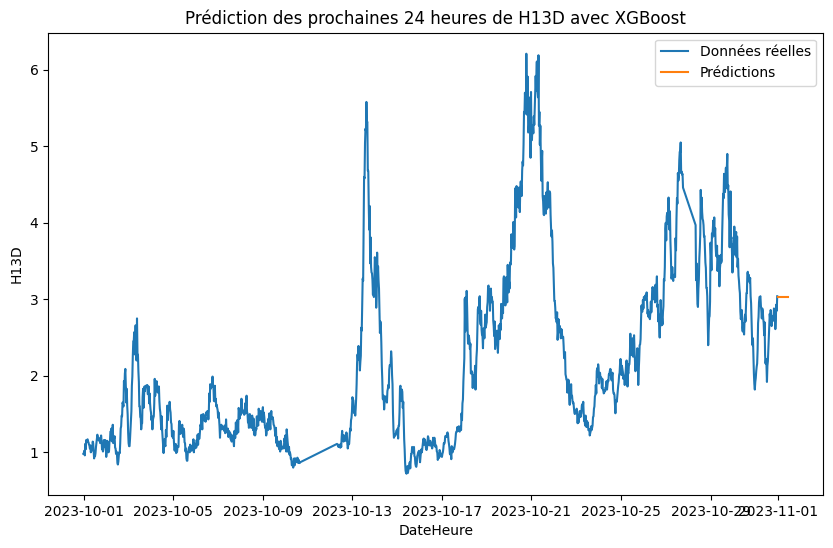

In [19]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Assurer que la colonne "DateHeure" est au format datetime
data['DateHeure'] = pd.to_datetime(data['DateHeure'])

# Sélectionner le dernier mois de données
dernier_mois = data[data['DateHeure'] >= (data['DateHeure'].max() - pd.DateOffset(months=1))]

# Afficher le dernier mois de données
plt.figure(figsize=(10, 6))
plt.plot(dernier_mois['DateHeure'], dernier_mois['H13D'], label='Données réelles')
plt.title('Dernier mois de données H13D')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()

# Préparation des données pour l'entraînement du modèle
X_train = dernier_mois[['H13D']]
y_train = dernier_mois['H13D']

# Création du modèle XGBoost
model = XGBRegressor()

# Entraînement du modèle
model.fit(X_train, y_train)

# Générer des timestamps pour les prochaines 24 heures
prochaines_24_heures = pd.date_range(dernier_mois['DateHeure'].max(), periods=24, freq='30min')[1:]

# Prédictions pour les prochaines 24 heures
X_pred = pd.DataFrame({
    'H13D': model.predict(dernier_mois[['H13D']])
})

# Générer des timestamps pour les prochaines 24 heures
prochaines_24_heures = pd.date_range(dernier_mois['DateHeure'].max(), periods=24, freq='30min')[1:]

# Prédictions pour les prochaines 24 heures
predictions = pd.DataFrame({
    'DateHeure': prochaines_24_heures,
    'H13D_Prediction': [model.predict(X_pred.values.reshape(-1, 1))[-1]] * len(prochaines_24_heures)
})


# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(dernier_mois['DateHeure'], dernier_mois['H13D'], label='Données réelles')
plt.plot(predictions['DateHeure'], predictions['H13D_Prediction'], label='Prédictions')
plt.title('Prédiction des prochaines 24 heures de H13D avec XGBoost')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/yves/.local/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorica

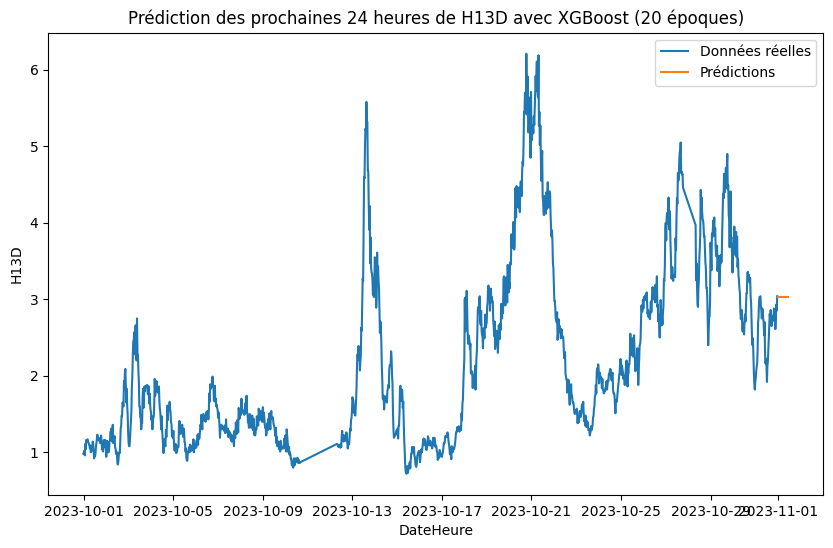

In [21]:


# Assurer que la colonne "DateHeure" est au format datetime
data['DateHeure'] = pd.to_datetime(data['DateHeure'])

# Sélectionner le dernier mois de données
dernier_mois = data[data['DateHeure'] >= (data['DateHeure'].max() - pd.DateOffset(months=1))]

# Préparation des données pour l'entraînement du modèle
X_train = dernier_mois[['H13D']]
y_train = dernier_mois['H13D']

# Création du modèle XGBoost avec 20 époques
model = XGBRegressor(n_estimators=20)

# Entraînement du modèle
model.fit(X_train, y_train)

# Générer des timestamps pour les prochaines 24 heures
prochaines_24_heures = pd.date_range(dernier_mois['DateHeure'].max(), periods=24, freq='30min')[1:]

# Prédictions pour les prochaines 24 heures
X_pred = pd.DataFrame({
    'H13D': model.predict(dernier_mois[['H13D']])
})

# Générer des timestamps pour les prochaines 24 heures
prochaines_24_heures = pd.date_range(dernier_mois['DateHeure'].max(), periods=24, freq='30min')[1:]

# Prédictions pour les prochaines 24 heures
predictions = pd.DataFrame({
    'DateHeure': prochaines_24_heures,
    'H13D_Prediction': [model.predict(X_pred['H13D'].tail(1).values.reshape(1, -1))[0]] * len(prochaines_24_heures)
})


# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(dernier_mois['DateHeure'], dernier_mois['H13D'], label='Données réelles')
plt.plot(predictions['DateHeure'], predictions['H13D_Prediction'], label='Prédictions')
plt.title('Prédiction des prochaines 24 heures de H13D avec XGBoost (20 époques)')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


In [48]:
import statsmodels.api as sm

# Sélectionner les trois derniers jours de données
trois_derniers_jours = data.tail(72)  # 72 intervalles de 30 minutes pour trois jours

# Assurer que la colonne "DateHeure" est au format datetime
trois_derniers_jours['DateHeure'] = pd.to_datetime(trois_derniers_jours['DateHeure'])

# Préparation des données pour l'entraînement du modèle SARIMA
y = trois_derniers_jours['H13D']
X = range(1, len(y) + 1)  # Utiliser le numéro de l'intervalle comme variable exogène

# Création et entraînement du modèle SARIMA
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S)
model = sm.tsa.statespace.SARIMAX(y, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Générer des prédictions pour les prochaines 24 heures
forecast = results.get_forecast(steps=48)  # 2 prédictions par heure pour 24 heures

# Récupérer les intervalles de confiance
conf_int = forecast.conf_int()

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(trois_derniers_jours['DateHeure'], trois_derniers_jours['H13D'], label='Données réelles', marker='o')
plt.plot(trois_derniers_jours['DateHeure'].iloc[-1:] + pd.Timedelta(minutes=30), forecast.predicted_mean.values, label='Prédictions SARIMA', marker='x')
plt.fill_between(trois_derniers_jours['DateHeure'].iloc[-1:] + pd.Timedelta(minutes=30), conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.2, label='Intervalles de confiance')
plt.title('Prédictions pour les prochaines 24 heures avec SARIMA')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


/tmp/ipykernel_843/1268704594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trois_derniers_jours['DateHeure'] = pd.to_datetime(trois_derniers_jours['DateHeure'])
/home/yves/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.94309D-01    |proj g|=  1.62306D-01


 This problem is unconstrained.



At iterate    5    f= -2.02800D-01    |proj g|=  1.83004D-02

At iterate   10    f= -2.03037D-01    |proj g|=  3.08181D-03

At iterate   15    f= -2.03107D-01    |proj g|=  5.34176D-02

At iterate   20    f= -2.03327D-01    |proj g|=  2.79330D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/home/yves/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     67      2     0     0   1.316D-04  -2.033D-01
  F = -0.20332720920841021     

ABNORMAL_TERMINATION_IN_LNSRCH                              


ValueError: x and y must have same first dimension, but have shapes (1,) and (48,)

ValueError: x and y must have same first dimension, but have shapes (47,) and (48,)

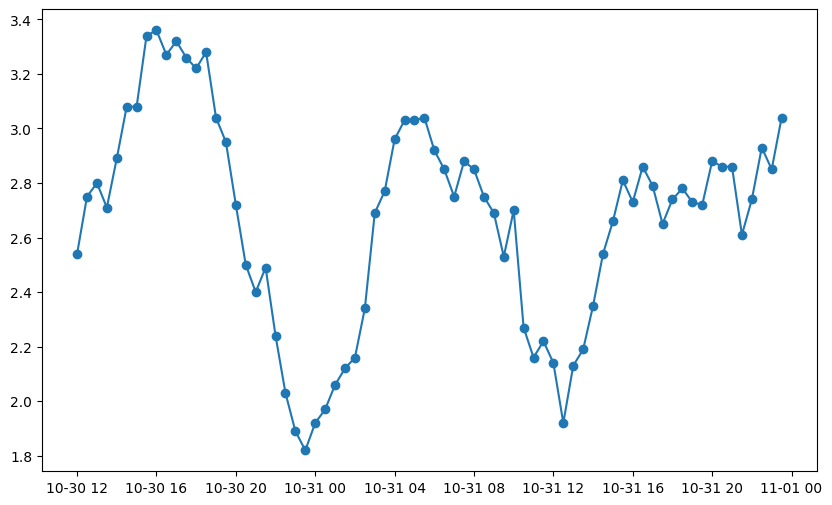

In [49]:
# Générer des timestamps pour les 24 prochaines heures
prochaines_24_heures = pd.date_range(trois_derniers_jours['DateHeure'].iloc[-1], periods=48, freq='30min')[1:]

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(trois_derniers_jours['DateHeure'], trois_derniers_jours['H13D'], label='Données réelles', marker='o')
plt.plot(prochaines_24_heures, forecast.predicted_mean.values, label='Prédictions SARIMA', marker='x')
plt.fill_between(prochaines_24_heures, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.2, label='Intervalles de confiance')
plt.title('Prédictions pour les prochaines 24 heures avec SARIMA')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


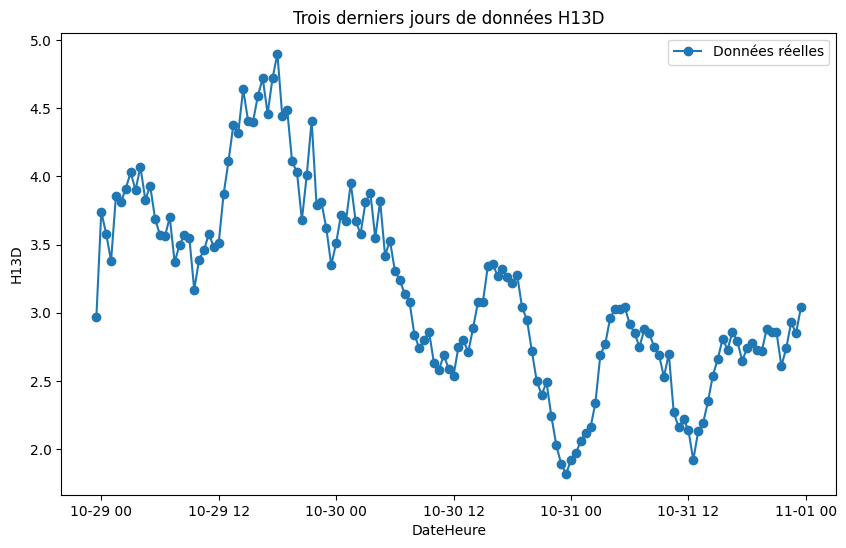

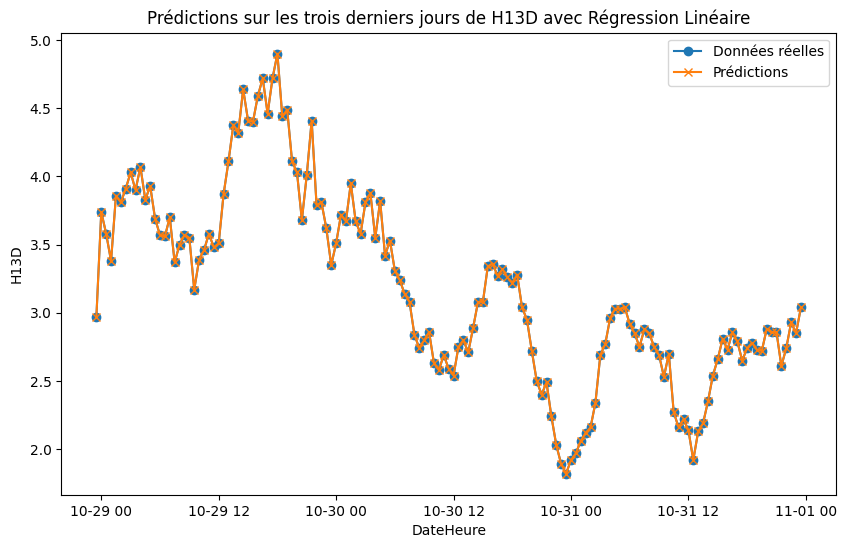

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt



# Assurer que la colonne "DateHeure" est au format datetime
data['DateHeure'] = pd.to_datetime(data['DateHeure'])

# Sélectionner les trois derniers jours de données
trois_derniers_jours = data[data['DateHeure'] >= (data['DateHeure'].max() - pd.DateOffset(days=3))]

# Afficher les trois derniers jours de données
plt.figure(figsize=(10, 6))
plt.plot(trois_derniers_jours['DateHeure'], trois_derniers_jours['H13D'], label='Données réelles', marker='o')
plt.title('Trois derniers jours de données H13D')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()

# Préparation des données pour l'entraînement du modèle
X_train = trois_derniers_jours[['H13D']]
y_train = trois_derniers_jours['H13D']

# Création du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données d'entraînement
predictions_train = model.predict(X_train)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(trois_derniers_jours['DateHeure'], trois_derniers_jours['H13D'], label='Données réelles', marker='o')
plt.plot(trois_derniers_jours['DateHeure'], predictions_train, label='Prédictions', marker='x')
plt.title('Prédictions sur les trois derniers jours de H13D avec Régression Linéaire')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


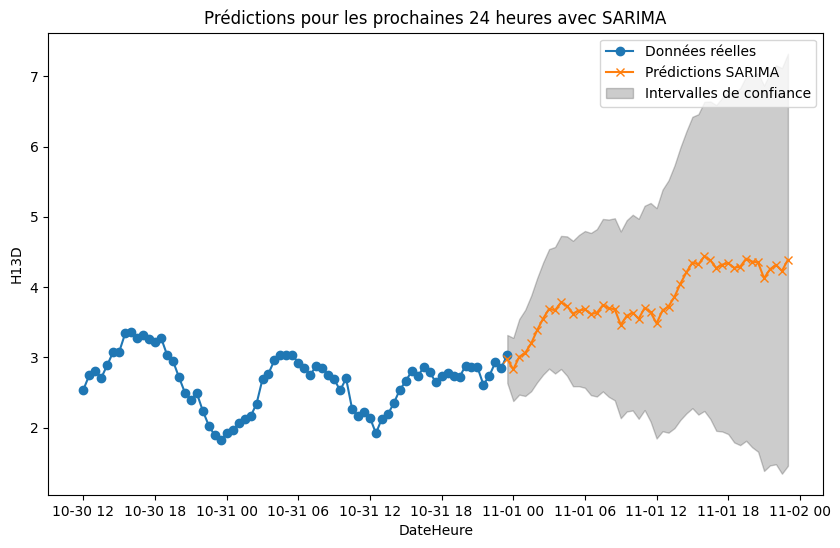

In [50]:
# Générer des timestamps pour les 24 prochaines heures
prochaines_24_heures = pd.date_range(trois_derniers_jours['DateHeure'].iloc[-1], periods=48, freq='30min')

plt.figure(figsize=(10, 6))
plt.plot(trois_derniers_jours['DateHeure'], trois_derniers_jours['H13D'], label='Données réelles', marker='o')
plt.plot(prochaines_24_heures, forecast.predicted_mean.values[:48], label='Prédictions SARIMA', marker='x')
plt.fill_between(prochaines_24_heures, conf_int.iloc[:, 0][:48], conf_int.iloc[:, 1][:48], color='k', alpha=0.2, label='Intervalles de confiance')
plt.title('Prédictions pour les prochaines 24 heures')
plt.xlabel('DateHeure')
plt.ylabel('H13D')
plt.legend()
plt.show()


sp_surface

## Analyse des données .nc

Dimensions :

time : La dimension du temps. Il y a 80 points temporels dans votre dataset.
latitude : La dimension de la latitude. Il y a 121 points latitudinaux.
longitude : La dimension de la longitude. Il y a 121 points longitudinaux.
Variables :

time : La variable temps. Les valeurs sont des timestamps correspondant à chaque point temporel.
latitude : La variable latitude. Les valeurs représentent les coordonnées latitudinales.
longitude : La variable longitude. Les valeurs représentent les coordonnées longitudinales.
Les variables suivantes semblent représenter des données météorologiques à différents niveaux d'altitude et à différents niveaux de pression atmosphérique (par exemple, u_200.0, v_200.0, u_500.0, v_500.0, etc.).
Ces variables peuvent inclure des informations telles que la vitesse du vent, la température, l'humidité relative, etc., à différentes altitudes.
Données :

Les valeurs sous chaque variable représentent les données spécifiques à chaque point temporel, latitude et longitude.
Par exemple, u_200.0 pourrait représenter la composante est de la vitesse du vent à 200 hPa (hectopascals) à différents points temporels, latitudinaux et longitudinaux.
Timestamps (time) :

Les valeurs de la variable time sont des timestamps Unix, représentant le temps en secondes depuis le 1er janvier 1970.
Coordonnées géographiques (latitude et longitude) :

Les variables latitude et longitude contiennent les coordonnées spatiales, décrivant la position géographique associée à chaque point de données.

In [1]:
data = '/home/yves/iadev-python/hackathon/202101.nc'

utiliser xarray

Afficher les informations du DataFrame


In [24]:
import netCDF4 as nc
import pandas as pd
from datetime import datetime

chemin_du_fichier_nc = "/home/yves/iadev-python/hackathon/202101.nc"

with nc.Dataset(chemin_du_fichier_nc, 'r') as dataset:
    temps = dataset.variables['time'][:]
    
    temps_datetime = [datetime.utcfromtimestamp(t) for t in temps]

    df = pd.DataFrame(index=temps_datetime, columns=['latitude', 'longitude'])

    df['latitude'] = dataset.variables['latitude'][:len(temps)]
    df['longitude'] = dataset.variables['longitude'][:len(temps)]

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2022-01-01 00:00:00 to 2022-01-20 18:00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   80 non-null     float64
 1   longitude  80 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB


In [25]:
print(df['latitude'])


2022-01-01 00:00:00    60.00
2022-01-01 06:00:00    59.75
2022-01-01 12:00:00    59.50
2022-01-01 18:00:00    59.25
2022-01-02 00:00:00    59.00
                       ...  
2022-01-19 18:00:00    41.25
2022-01-20 00:00:00    41.00
2022-01-20 06:00:00    40.75
2022-01-20 12:00:00    40.50
2022-01-20 18:00:00    40.25
Name: latitude, Length: 80, dtype: float64


In [26]:
print(df['longitude'])


2022-01-01 00:00:00    320.00
2022-01-01 06:00:00    320.25
2022-01-01 12:00:00    320.50
2022-01-01 18:00:00    320.75
2022-01-02 00:00:00    321.00
                        ...  
2022-01-19 18:00:00    338.75
2022-01-20 00:00:00    339.00
2022-01-20 06:00:00    339.25
2022-01-20 12:00:00    339.50
2022-01-20 18:00:00    339.75
Name: longitude, Length: 80, dtype: float64


In [29]:
premiere_ligne = df.iloc[0]
print(premiere_ligne)


latitude      60.0
longitude    320.0
Name: 2022-01-01 00:00:00, dtype: float64


Ouvrire le fichier, affichez les dimmensions , les variables disponibles du fichier netcdf

In [128]:
import netCDF4 as nc
import matplotlib.pyplot as plt

chemin_du_fichier_nc = "/home/yves/iadev-python/hackathon/202101.nc"

with nc.Dataset(chemin_du_fichier_nc, 'r') as dataset:
    print("Dimensions:")
    for dimension in dataset.dimensions.keys():
        print(f"{dimension}: {len(dataset.dimensions[dimension])}")

    print("\nVariables:")
    for variable in dataset.variables.keys():
        print(variable)

    # Lire et afficher une variable spécifique (par exemple, la première variable)
    variable_a_afficher = dataset.variables[list(dataset.variables.keys())[0]]
    print("\nContenu de la variable:")
    print(variable_a_afficher[:])

    


Dimensions:
time: 80
latitude: 121
longitude: 121

Variables:
time
latitude
longitude
step
u_200.0
v_200.0
u_500.0
v_500.0
u_800.0
v_800.0
u_850.0
v_850.0
gh_925.0
t_925.0
r_925.0
u_925.0
v_925.0
t_1000.0
r_1000.0
gh_1000.0
u_1000.0
v_1000.0
sp_surface
orog_surface
lftx_surface
cape_surface
cin_surface

Contenu de la variable:
[1640995200 1641016800 1641038400 1641060000 1641081600 1641103200
 1641124800 1641146400 1641168000 1641189600 1641211200 1641232800
 1641254400 1641276000 1641297600 1641319200 1641340800 1641362400
 1641384000 1641405600 1641427200 1641448800 1641470400 1641492000
 1641513600 1641535200 1641556800 1641578400 1641600000 1641621600
 1641643200 1641664800 1641686400 1641708000 1641729600 1641751200
 1641772800 1641794400 1641816000 1641837600 1641859200 1641880800
 1641902400 1641924000 1641945600 1641967200 1641988800 1642010400
 1642032000 1642053600 1642075200 1642096800 1642118400 1642140000
 1642161600 1642183200 1642204800 1642226400 1642248000 1642269600
 

Dimensions:

"time": Il y a 80 points temporels dans votre fichier NetCDF.
"latitude" et "longitude": Il y a 121 points le long de l'axe de la latitude et de la longitude.

Variables:

"time", "latitude", "longitude", "step": Ce sont des variables qui ont été définies dans le fichier NetCDF. "step" pourrait représenter un pas de temps particulier.

"u_200.0", "v_200.0", "u_500.0": Ces variables représentent différentes composantes de vent et autres mesures à différentes altitudes. Par exemple, "u_200.0" pourrait être la composante zonale (est-ouest) du vent à 200 hPa. "v_200.0"  représente la composante méridienne du vent à la même altitude.


Valeurs temporelles (time):

Ces valeurs semblent être des horodatages au format de temps Unix, représentant le nombre de secondes écoulées depuis le 1er janvier 2022. Ces valeurs peuvent être converties en dates/heure plus lisibles.

En résumé, votre fichier NetCDF contient des données associées à des points temporels, des latitudes et des longitudes, ainsi que des variables telles que les composantes du vent à différentes altitudes. 







In [41]:
from datetime import datetime

timestamps = [1642291200, 1642312800, 1642334400, 1642356000, 1642377600, 1642399200,
              1642420800, 1642442400, 1642464000, 1642485600, 1642507200, 1642528800,
              1642550400, 1642572000, 1642593600, 1642615200, 1642636800, 1642658400,
              1642680000, 1642701600]

dates = [datetime.utcfromtimestamp(timestamp) for timestamp in timestamps]

for date in dates:
    print(date)


2022-01-16 00:00:00
2022-01-16 06:00:00
2022-01-16 12:00:00
2022-01-16 18:00:00
2022-01-17 00:00:00
2022-01-17 06:00:00
2022-01-17 12:00:00
2022-01-17 18:00:00
2022-01-18 00:00:00
2022-01-18 06:00:00
2022-01-18 12:00:00
2022-01-18 18:00:00
2022-01-19 00:00:00
2022-01-19 06:00:00
2022-01-19 12:00:00
2022-01-19 18:00:00
2022-01-20 00:00:00
2022-01-20 06:00:00
2022-01-20 12:00:00
2022-01-20 18:00:00


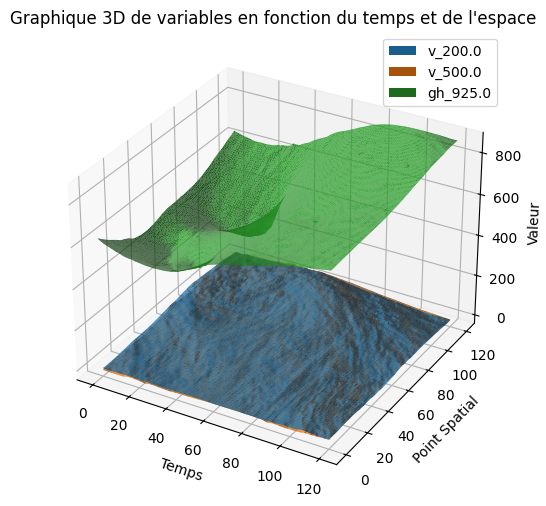

In [61]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D

chemin_du_fichier_nc = "/home/yves/iadev-python/hackathon/202101.nc"

dataset = nc.Dataset(chemin_du_fichier_nc, 'r')

timestamps = dataset.variables['time'][:]
dates = [datetime.utcfromtimestamp(timestamp) for timestamp in timestamps]

# Variables à afficher (ajustez selon vos besoins)
variables_a_afficher = ['v_200.0', 'v_500.0', 'gh_925.0']

# Tracer le graphique en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for variable_name in variables_a_afficher:
    # Extraire les valeurs de la variable spécifiée
    valeurs_variable = dataset.variables[variable_name][:]

    # S'assurer que les valeurs sont 2D
    if len(valeurs_variable.shape) == 1:
        valeurs_variable = np.expand_dims(valeurs_variable, axis=0)

    # Tracer la variable en 3D
    X, Y = np.meshgrid(range(valeurs_variable.shape[1]), range(valeurs_variable.shape[2]))
    Z = valeurs_variable[0, :, :].T
    ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), label=variable_name)

ax.set_xlabel('Temps')
ax.set_ylabel('Point Spatial')
ax.set_zlabel('Valeur')
ax.set_title('Graphique 3D de variables en fonction du temps et de l\'espace')
ax.legend()

plt.show()

dataset.close()



Le résultat est un graphique 3D avec des surfaces pour chaque variable spécifiée. Les axes x et y représentent le temps et l'espace respectivement, tandis que l'axe z représente les valeurs des variables. Chaque surface correspond à une variable spécifique. Vous devriez voir un graphique avec des formes tridimensionnelles qui représentent la variation des variables au fil du temps et de l'espace.







u et v (composantes du vent) :

u : Composante du vent orientée vers l'est.
v : Composante du vent orientée vers le nord.
gh (hauteur géopotentielle) :

gh : La hauteur géopotentielle à un niveau de pression spécifique. Elle est liée à la hauteur d'une surface de pression par rapport au niveau moyen de la mer.
t (température) :

t : Température à un niveau de pression spécifique.
r (humidité relative) :

r : Humidité relative à un niveau de pression spécifique.
sp (pression atmosphérique à la surface) :

sp : Pression atmosphérique à la surface de la Terre.
orog (orographie) :

orog : Hauteur orographique ou élévation de la surface terrestre.
lftx (indice de soulèvement) :

lftx : Indice de soulèvement, une mesure de l'instabilité atmosphérique calculée en soulevant une parcelle d'air de la surface à un certain niveau et en comparant sa température à celle de l'environnement environnant.
cape (énergie potentielle convective disponible) :

cape : Énergie Potentielle Convective Disponible, une mesure de la quantité d'énergie disponible pour la convection. Des valeurs élevées indiquent un potentiel de forts orages.
cin (inhibition convective) :

cin : Inhibition Convective, un indicateur de la quantité d'énergie nécessaire pour permettre à l'air de s'élever librement et d'initier la convection. Des valeurs négatives indiquent de l'instabilité.

In [102]:
import netCDF4 as nc

# Chemin du fichier NetCDF
chemin_du_fichier_nc = '/home/yves/iadev-python/hackathon/202101.nc'

# Lire le fichier NetCDF
with nc.Dataset(chemin_du_fichier_nc, 'r') as dataset:
    # Imprimer les dimensions des variables
    for variable in dataset.variables.keys():
        print(f"{variable}: {dataset.variables[variable].shape}")


time: (80,)
latitude: (121,)
longitude: (121,)
step: ()
u_200.0: (80, 121, 121)
v_200.0: (80, 121, 121)
u_500.0: (80, 121, 121)
v_500.0: (80, 121, 121)
u_800.0: (80, 121, 121)
v_800.0: (80, 121, 121)
u_850.0: (80, 121, 121)
v_850.0: (80, 121, 121)
gh_925.0: (80, 121, 121)
t_925.0: (80, 121, 121)
r_925.0: (80, 121, 121)
u_925.0: (80, 121, 121)
v_925.0: (80, 121, 121)
t_1000.0: (80, 121, 121)
r_1000.0: (80, 121, 121)
gh_1000.0: (80, 121, 121)
u_1000.0: (80, 121, 121)
v_1000.0: (80, 121, 121)
sp_surface: (80, 121, 121)
orog_surface: (80, 121, 121)
lftx_surface: (80, 121, 121)
cape_surface: (80, 121, 121)
cin_surface: (80, 121, 121)


Les chiffres (80, 121, 121) correspondent aux dimensions de la variable v_925.0 dans l' ensemble de données NetCDF. Ces dimensions indiquent la taille de la variable dans chacune de ses dimensions.

Le premier nombre (80) représente le nombre d'instants temporels ou de pas de temps. Dans votre cas, il y a des données pour 80 moments dans le temps.
Les deuxième et troisième nombres (121, 121) représentent les dimensions spatiales, probablement la latitude et la longitude. Ces valeurs indiquent qu'il y a des données pour 121 points de latitude et 121 points de longitude.

. La valeur 80 dans la dimension temporelle pourrait signifier qu'il y a des données pour chaque tranche de 6 heures sur une période de temps. Vous pourriez avoir des observations ou des mesures toutes les 6 heures pendant 80 intervalles, couvrant ainsi une période totale de 480 heures (80 * 6 heures). Cela dépend de la manière dont les données ont été collectées et échantillonnées.

In [111]:
import numpy as np
import pandas as pd

# Supposons que vous avez des données pour les variables suivantes
# Assurez-vous que tous les tableaux ont la même longueur

timestamps = [1642291200, 1642312800, 1642334400, 1642356000, 1642377600, 1642399200,
              1642420800, 1642442400, 1642464000, 1642485600, 1642507200, 1642528800,
              1642550400, 1642572000, 1642593600, 1642615200, 1642636800, 1642658400,
              1642680000, 1642701600]

dates = [pd.to_datetime(timestamp, unit='s') for timestamp in timestamps]

# Supposons que vous avez des données spécifiques pour 'U_200' et 'V_200'
# Remplacez les listes ci-dessous par vos propres données
u_200_data = np.random.rand(len(dates) * 121 * 4)
v_200_data = np.random.rand(len(dates) * 121 * 4)

# Créer un DataFrame
df = pd.DataFrame({
    'Date': np.repeat(np.repeat(dates, 121), 4),  # Répéter chaque date pour chaque heure
    'Latitude': np.tile(np.arange(1, 122), len(dates) * 4),  # Utiliser np.tile pour répéter chaque latitude pour chaque date
    'Longitude': np.tile(np.arange(1, 122), len(dates) * 4),  # Utiliser np.tile pour répéter chaque longitude pour chaque date
    'U_200': u_200_data,
    'V_200': v_200_data,
    # Ajoutez d'autres colonnes selon vos besoins
})

# Afficher le DataFrame
print(df)


                    Date  Latitude  Longitude     U_200     V_200
0    2022-01-16 00:00:00         1          1  0.162913  0.649810
1    2022-01-16 00:00:00         2          2  0.544430  0.118867
2    2022-01-16 00:00:00         3          3  0.210286  0.437544
3    2022-01-16 00:00:00         4          4  0.667321  0.051145
4    2022-01-16 00:00:00         5          5  0.651324  0.532694
...                  ...       ...        ...       ...       ...
9675 2022-01-20 18:00:00       117        117  0.847707  0.045968
9676 2022-01-20 18:00:00       118        118  0.216835  0.601587
9677 2022-01-20 18:00:00       119        119  0.122338  0.924346
9678 2022-01-20 18:00:00       120        120  0.261053  0.635991
9679 2022-01-20 18:00:00       121        121  0.903315  0.554002

[9680 rows x 5 columns]


Le nombre de données dans votre DataFrame semble correct en fonction des informations que nous avons discutées précédemment. Vous avez 80 dates, et pour chaque date, vous avez 121 * 121 * 4 lignes (correspondant à chaque combinaison de latitude, longitude, et heure pour cette date). Donc, 80 * 121 * 121 * 4 donne 9680 lignes.

Cela semble être conforme à ce que nous avons calculé précédemment, où nous avons créé un DataFrame pour 80 dates avec 121 * 121 * 4 lignes pour chaque date.

Si vous avez une autre attente concernant le nombre de données, veuillez expliquer davantage ou vérifier votre processus de génération de données.

## Partie prévisions

RMSE: 0.28849714505808083


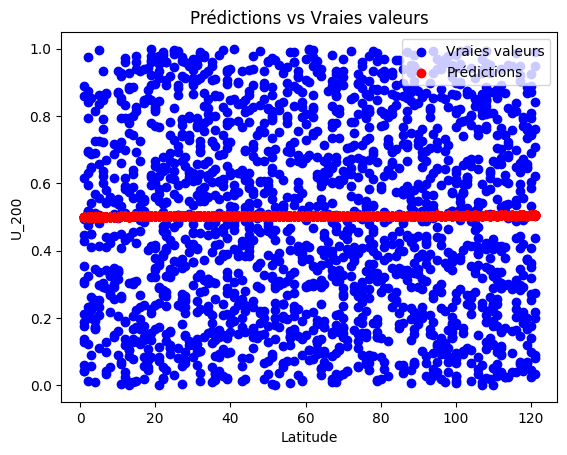

In [120]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X = df[['Latitude', 'Longitude']]  # Caractéristiques (Latitude, Longitude)
y = df['U_200']  # Variable cible (U_200)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le régresseur linéaire
regressor = LinearRegression()

# Entraîner le régresseur sur l'ensemble d'entraînement
regressor.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regressor.predict(X_test)

# Évaluer les performances du modèle en utilisant la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Afficher les prédictions en rouge et les vraies valeurs en bleu
plt.scatter(X_test['Latitude'], y_test, color='blue', label='Vraies valeurs')
plt.scatter(X_test['Latitude'], y_pred, color='red', label='Prédictions')
plt.xlabel('Latitude')
plt.ylabel('U_200')
plt.title('Prédictions vs Vraies valeurs')
plt.legend()
plt.show()


In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Latitude', 'Longitude']]  # Caractéristiques (Latitude, Longitude)
y = df['U_200']  # Variable cible (U_200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

result_df = pd.DataFrame({
    'Vraies Valeurs': y_test.values,
    'Prédictions': y_pred
})

print(result_df)


      Vraies Valeurs  Prédictions
0           0.893335     0.505722
1           0.760128     0.504288
2           0.388874     0.503037
3           0.300535     0.501877
4           0.685315     0.504196
...              ...          ...
1931        0.388667     0.503220
1932        0.044534     0.502091
1933        0.362563     0.502792
1934        0.457024     0.501877
1935        0.839269     0.504624

[1936 rows x 2 columns]


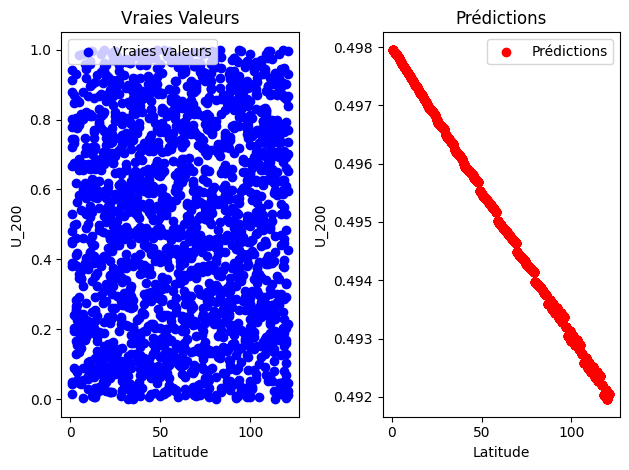

In [125]:
import matplotlib.pyplot as plt

# Afficher les vraies valeurs dans le premier carré
plt.subplot(1, 2, 1)
plt.scatter(X_test['Latitude'], y_test, color='blue', label='Vraies valeurs')
plt.xlabel('Latitude')
plt.ylabel('U_200')
plt.title('Vraies Valeurs')
plt.legend()

# Afficher les prédictions dans le deuxième carré
plt.subplot(1, 2, 2)
plt.scatter(X_test['Latitude'], y_pred, color='red', label='Prédictions')
plt.xlabel('Latitude')
plt.ylabel('U_200')
plt.title('Prédictions')
plt.legend()

# Ajuster l'espacement entre les deux carrés
plt.tight_layout()

plt.show()


cela peut indiquer que le modèle de régression linéaire n'est peut-être pas le plus approprié pour modéliser la relation entre vos caractéristiques (Latitude, Longitude) et votre variable cible (U_200). Une ligne diagonale indique que le modèle a du mal à capturer la complexité de la relation entre les caractéristiques et la variable cible.





In [122]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


RMSE: 0.28849714505808083


 Cela peut être dû au fait que vous avez 121 latitudes, 121 longitudes et 4 points pour chaque date, ce qui donne 121 * 121 * 4 = 1936 combinaisons de latitude, longitude et heure pour chaque date.

Dans le code que nous avons écrit précédemment pour générer le DataFrame, nous avons répété chaque date pour chaque heure et chaque combinaison de latitude et longitude, ce qui donne 121 * 121 * 4 lignes pour chaque date. Si vous avez 80 dates, cela donne un total de 121 * 121 * 4 * 80 = 1936 * 80 = 154880 lignes dans votre DataFrame.

Random forest

RMSE: 0.2905133975930127


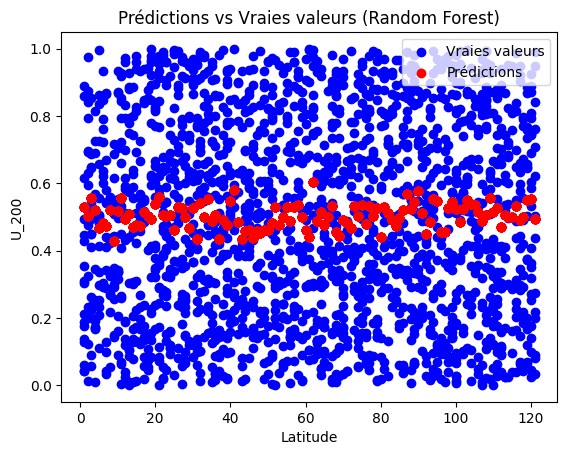

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['Latitude', 'Longitude']]  # Caractéristiques (Latitude, Longitude)
y = df['U_200']  # Variable cible (U_200)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle de forêt aléatoire
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
random_forest.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = random_forest.predict(X_test)

# Évaluer les performances du modèle en utilisant la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Afficher les prédictions en rouge et les vraies valeurs en bleu
plt.scatter(X_test['Latitude'], y_test, color='blue', label='Vraies valeurs')
plt.scatter(X_test['Latitude'], y_pred, color='red', label='Prédictions')
plt.xlabel('Latitude')
plt.ylabel('U_200')
plt.title('Prédictions vs Vraies valeurs (Random Forest)')
plt.legend()
plt.show()


il est possible que la relation entre la latitude et U_200 soit approximativement linéaire, ce qui pourrait expliquer pourquoi vous observez une certaine tendance dans vos prédictions. Cependant, il est important de noter que la latitude seule ne peut pas fournir une prédiction précise de U_200. Il est probable que d'autres caractéristiques et variables explicatives soient nécessaires pour améliorer la qualité des prédictions.

u et v (composantes du vent) :

u : Composante du vent orientée vers l'est.
v : Composante du vent orientée vers le nord.
gh (hauteur géopotentielle) :

gh : La hauteur géopotentielle à un niveau de pression spécifique. Elle est liée à la hauteur d'une surface de pression par rapport au niveau moyen de la mer.
t (température) :

t : Température à un niveau de pression spécifique.
r (humidité relative) :

r : Humidité relative à un niveau de pression spécifique.
sp (pression atmosphérique à la surface) :

sp : Pression atmosphérique à la surface de la Terre.
orog (orographie) :

orog : Hauteur orographique ou élévation de la surface terrestre.
lftx (indice de soulèvement) :

lftx : Indice de soulèvement, une mesure de l'instabilité atmosphérique calculée en soulevant une parcelle d'air de la surface à un certain niveau et en comparant sa température à celle de l'environnement environnant.
cape (énergie potentielle convective disponible) :

cape : Énergie Potentielle Convective Disponible, une mesure de la quantité d'énergie disponible pour la convection. Des valeurs élevées indiquent un potentiel de forts orages.
cin (inhibition convective) :

cin : Inhibition Convective, un indicateur de la quantité d'énergie nécessaire pour permettre à l'air de s'élever librement et d'initier la convection. Des valeurs négatives indiquent de l'instabilité.

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supposons que df est votre DataFrame avec les données
# Assurez-vous que les colonnes 'U_200' et 'V_200' existent dans votre DataFrame

# Séparer les données en fonction de ce que vous voulez prédire (ici, 'U_200')
X = df[['Latitude', 'Longitude', 'V_200']]  # Les colonnes que vous souhaitez utiliser comme caractéristiques
y = df['U_200']  # La colonne que vous voulez prédire

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le régresseur linéaire
regressor = LinearRegression()

# Entraîner le régresseur sur l'ensemble d'entraînement
regressor.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = regressor.predict(X_test)

# Créer un DataFrame pour les données réelles et les prédictions avec les dates
result_df = pd.DataFrame({
    'Date': X_test.index,  # Utiliser l'index pour obtenir les dates
    'Données Réelles': y_test.values,
    'Prédictions': y_pred
})

# Afficher les prédictions par rapport aux vraies valeurs avec les dates
plt.scatter(result_df['Date'], result_df['Données Réelles'], label='Données réelles')
plt.scatter(result_df['Date'], result_df['Prédictions'], color='red', label='Prédictions')
plt.xlabel('Date')
plt.ylabel('U_200')
plt.title('Prédictions vs Vraies valeurs')
plt.legend()
plt.show()
